In [95]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

First to scrape first page

In [2]:
url = 'http://books.toscrape.com/index.html'

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

In [3]:
books = soup.find_all('li', class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")

In [4]:
print(len(books))

20


In [5]:
print(books[0])

<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">
<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>
</li>


In [6]:
book_1 = books[0]

In [7]:
#book title
book_1.find('h3').text.strip()

'A Light in the ...'

In [8]:
#book full name
book_1.find('h3').contents[-1]['title'].strip()

'A Light in the Attic'

In [63]:
#price
book_1.find('div', class_='product_price')('p')[0].text.strip()

'Â£51.77'

In [64]:
book_1.find('div', class_='product_price')('p')[0].text[1]

'£'

In [65]:
#in stock 
book_1.find('div', class_='product_price')('p')[1].text.strip()

'In stock'

In [66]:
book_1.find('a')['href']

'catalogue/a-light-in-the-attic_1000/index.html'

In [13]:
book_list = []

for book in books:
    name = book.find('h3').text.strip()
    full_name = book.find('h3').contents[-1]['title'].strip()
    price = book.find('div', class_='product_price')('p')[0].text.strip()
    available = book.find('div', class_='product_price')('p')[1].text.strip()
    url = 'www.' + book.find('a')['href']
    
    boks = {
        'book_title':name,
        'title':full_name,
        'price':price,
        'availability':available,
        'url':url
    } 
    
    book_list.append(boks)

In [14]:
pd.DataFrame(book_list)

,book_title,title,price,availability,url
0,A Light in the ...,A Light in the Attic,Â£51.77,In stock,www.catalogue/a-light-in-the-attic_1000/index....
1,Tipping the Velvet,Tipping the Velvet,Â£53.74,In stock,www.catalogue/tipping-the-velvet_999/index.html
2,Soumission,Soumission,Â£50.10,In stock,www.catalogue/soumission_998/index.html
3,Sharp Objects,Sharp Objects,Â£47.82,In stock,www.catalogue/sharp-objects_997/index.html
4,Sapiens: A Brief History ...,Sapiens: A Brief History of Humankind,Â£54.23,In stock,www.catalogue/sapiens-a-brief-history-of-human...
5,The Requiem Red,The Requiem Red,Â£22.65,In stock,www.catalogue/the-requiem-red_995/index.html
6,The Dirty Little Secrets ...,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,In stock,www.catalogue/the-dirty-little-secrets-of-gett...
7,The Coming Woman: A ...,The Coming Woman: A Novel Based on the Life of...,Â£17.93,In stock,www.catalogue/the-coming-woman-a-novel-based-o...
8,The Boys in the ...,The Boys in the Boat: Nine Americans and Their...,Â£22.60,In stock,www.catalogue/the-boys-in-the-boat-nine-americ...
9,The Black Maria,The Black Maria,Â£52.15,In stock,www.catalogue/the-black-maria_991/index.html


Now to scrape multiple pages

In [19]:
#hence website is broken at:: page- + str(page) -- which is specified in range and then + .html
full_website = 'http://books.toscrape.com/catalogue/page-40.html'

In [77]:
urlz = 'http://books.toscrape.com/catalogue/page-'

newbook_list = []


for page in range(1,51):
    r = requests.get(urlz + str(page) + '.html')
    souper = BeautifulSoup(r.text, 'html.parser')
    boz = souper.find_all('li', class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")
    
    
    
   

    for bo in boz:
    
        
        full_namez = bo.find('h3').contents[-1]['title'].strip()
        pricez = bo.find('div', class_='product_price')('p')[0].text.replace('Â£','')
        currency = bo.find('div', class_='product_price')('p')[0].text[1]
        availablez = bo.find('div', class_='product_price')('p')[1].text.strip()
        url = 'https://www.' + bo.find('a')['href']
        

        bookz = {
            
            'title':full_namez,
            'currency':currency,
            'price':pricez,
            'availability':availablez,
            'url':url
        } 

        newbook_list.append(bookz)

In [78]:
new_df = pd.DataFrame(newbook_list)
new_df

,title,currency,price,availability,url
0,A Light in the Attic,£,51.77,In stock,https://www.a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,£,53.74,In stock,https://www.tipping-the-velvet_999/index.html
2,Soumission,£,50.10,In stock,https://www.soumission_998/index.html
3,Sharp Objects,£,47.82,In stock,https://www.sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,£,54.23,In stock,https://www.sapiens-a-brief-history-of-humanki...
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,£,55.53,In stock,https://www.alice-in-wonderland-alices-adventu...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",£,57.06,In stock,https://www.ajin-demi-human-volume-1-ajin-demi...
997,A Spy's Devotion (The Regency Spies of London #1),£,16.97,In stock,https://www.a-spys-devotion-the-regency-spies-...
998,1st to Die (Women's Murder Club #1),£,53.98,In stock,https://www.1st-to-die-womens-murder-club-1_2/...


In [79]:
#Basic EDA

In [84]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [86]:
new_df

,title,currency,price,availability,url
0,A Light in the Attic,£,51.77,In stock,https://www.a-light-in-the-attic_1000/index.html
1,Tipping the Velvet,£,53.74,In stock,https://www.tipping-the-velvet_999/index.html
2,Soumission,£,50.10,In stock,https://www.soumission_998/index.html
3,Sharp Objects,£,47.82,In stock,https://www.sharp-objects_997/index.html
4,Sapiens: A Brief History of Humankind,£,54.23,In stock,https://www.sapiens-a-brief-history-of-humanki...
5,The Requiem Red,£,22.65,In stock,https://www.the-requiem-red_995/index.html
6,The Dirty Little Secrets of Getting Your Dream...,£,33.34,In stock,https://www.the-dirty-little-secrets-of-gettin...
7,The Coming Woman: A Novel Based on the Life of...,£,17.93,In stock,https://www.the-coming-woman-a-novel-based-on-...
8,The Boys in the Boat: Nine Americans and Their...,£,22.60,In stock,https://www.the-boys-in-the-boat-nine-american...
9,The Black Maria,£,52.15,In stock,https://www.the-black-maria_991/index.html


In [87]:
new_df.shape

(1000, 5)

In [88]:
new_df.describe()

,title,currency,price,availability,url
count,1000,1000,1000,1000,1000
unique,999,1,903,1,1000
top,The Star-Touched Queen,£,44.18,In stock,https://www.the-da-vinci-code-robert-langdon-2...
freq,2,1000,3,1000,1


In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         1000 non-null   object
 1   currency      1000 non-null   object
 2   price         1000 non-null   object
 3   availability  1000 non-null   object
 4   url           1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [97]:
new_df['price'] = pd.to_numeric(new_df.price)

In [100]:
new_df.dtypes

title            object
currency         object
price           float64
availability     object
url              object
dtype: object

In [106]:
#top 5 expensive book
new_df.groupby('title')['price'].sum().nlargest(10)

title
The Star-Touched Queen                                                                       78.32
The Perfect Play (Play by Play #1)                                                           59.99
Last One Home (New Beginnings #1)                                                            59.98
Civilization and Its Discontents                                                             59.95
The Barefoot Contessa Cookbook                                                               59.92
The Diary of a Young Girl                                                                    59.90
The Bone Hunters (Lexy Vaughan & Steven Macaulay #2)                                         59.71
Thomas Jefferson and the Tripoli Pirates: The Forgotten War That Changed American History    59.64
Boar Island (Anna Pigeon #19)                                                                59.48
The Improbability of Love                                                                    59.45
Name

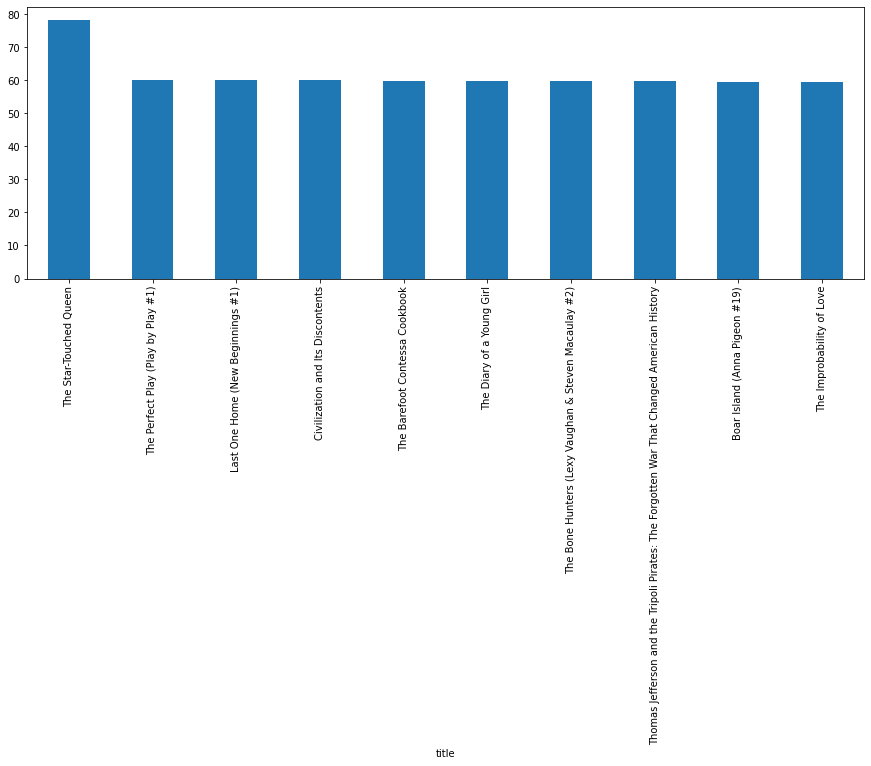

In [111]:
new_df.groupby('title')['price'].sum().nlargest(10).plot(kind='bar', figsize=(15,5))